<h3 style="text-align: center;">Lab 08: Multi Band Raster</h3>

- This lab covers the Arcpy, including topics such as SearchCursor, UpdateCursor and InsertCursor. 

- There are four questions in total. Please provide your code answers directly below each question.

- Make sure to run all cells so that the answers are stored. Once completed, submit the .ipynb file (**ensuring that all answers are included**) to Canvas by **midnight (11:29 PM) on September 29**.

- This lab is worth a total of **65 points** and contributes **6.5%** toward the final grade.

## 1. Calculating NDWI

In [3]:
import geopandas as gpd
import rasterio
import os
import rasterio.plot
import matplotlib.pyplot as plt
import numpy as np
import rasterio.mask

In [22]:
os.getcwd()

'f:\\Clark_Universiy\\Clark_Teaching\\Git_Repo\\ssj-302\\docs\\Labs\\Lab08'

In [4]:
dem_path = os.path.join(os.getcwd(),  "landsat.tif")
dem_path

'f:\\Clark_Universiy\\Clark_Teaching\\Git_Repo\\ssj-302\\docs\\Labs\\Lab08\\landsat.tif'

In [5]:
landsat = rasterio.open(dem_path)

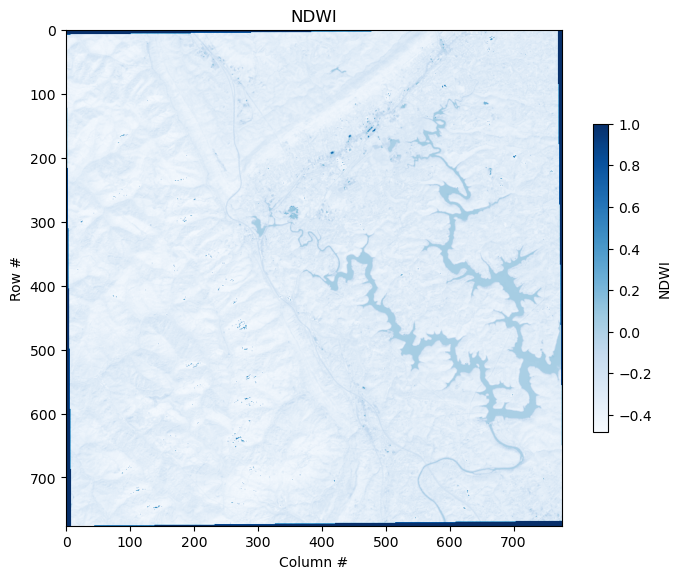

In [6]:
nir = landsat.read(5)
green_band = landsat.read(3)

ndwi = (green_band - nir) / (green_band + nir)

plt.figure(figsize=(8, 8))
plt.imshow(ndwi, cmap="Blues")
plt.colorbar(label="NDWI", shrink=0.5)
plt.title("NDWI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

## 2. Calculate Urban Index (UI)

Purpose: Distinguishes built-up urban areas from natural landscapes.

The Urban Index (UI) is derived from the difference between the Normalized Difference Built-Up Index (NDBI) and the Normalized Difference Vegetation Index (NDVI), two indices that capture the contrast between built-up areas and vegetation

UI=NDBI−NDVI

In [1]:
dem_path = os.path.join(os.getcwd(),  "city.tif")

landsat_city = rasterio.open(dem_path)

NameError: name 'os' is not defined

### 3. Calculate Normalized Difference Built-Up Index (NDBI)
The Normalized Difference Built-Up Index (NDBI) is an index designed to highlight built-up or urban areas in satellite imagery. It is particularly effective for identifying urban regions, as built-up surfaces (such as buildings and roads) have a higher reflectance in the Shortwave Infrared (SWIR) than in the Near Infrared (NIR).

NDBI = (SWIR - NIR) / (SWIR - NIR)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24940\2276541706.py:4: RuntimeWarning: invalid value encountered in divide
  ndbi = (swir_band - nir) / (swir_band + nir)


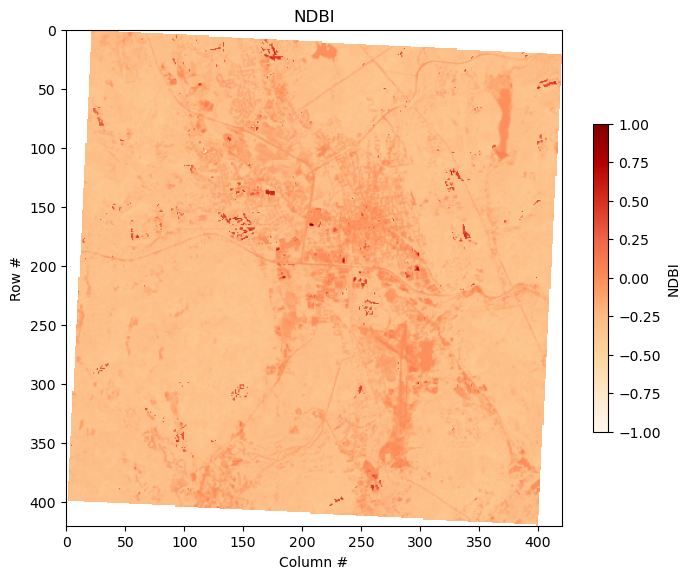

In [36]:
nir = landsat_city.read(5)
swir_band = landsat_city.read(7)

ndbi = (swir_band - nir) / (swir_band + nir)

# ndvi = ndvi.clip(-1, 1)

plt.figure(figsize=(8, 8))
plt.imshow(ndbi, cmap="OrRd", vmin=-1, vmax=1)
plt.colorbar(label="NDBI", shrink=0.5)
plt.title("NDBI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

### 4. Calculate Normalized Difference Vegetation Index (NDVI)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24940\556425359.py:4: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)


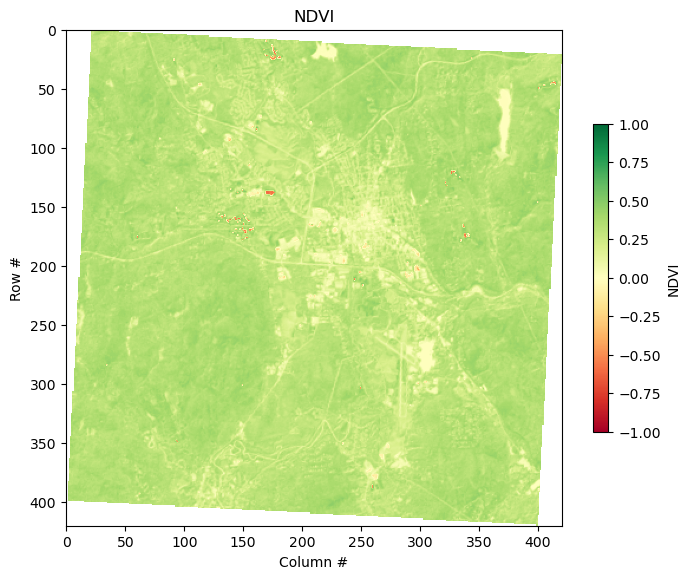

In [37]:
nir = landsat_city.read(5)
red_band = landsat_city.read(4)

ndvi = (nir - red_band) / (nir + red_band)

# ndvi = ndvi.clip(-1, 1)

plt.figure(figsize=(8, 8))
plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI", shrink=0.5)
plt.title("NDVI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

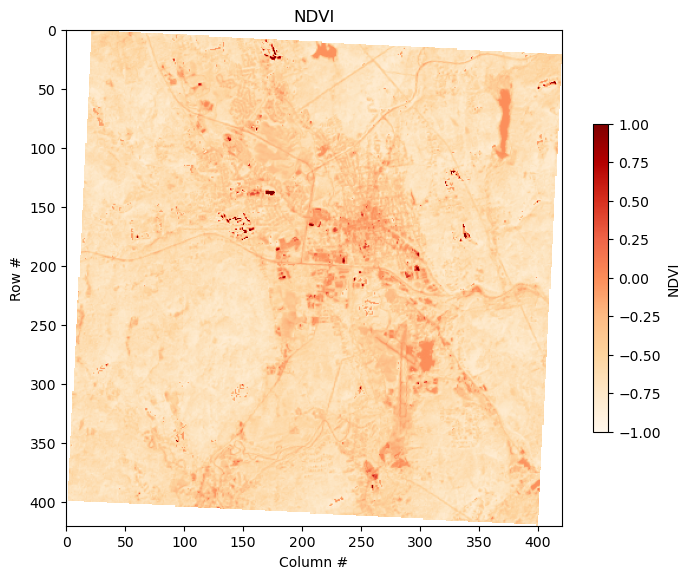

In [38]:

ui = ndbi - ndvi

plt.figure(figsize=(8, 8))
plt.imshow(ui, cmap="OrRd", vmin=-1, vmax=1)
plt.colorbar(label="NDVI", shrink=0.5)
plt.title("NDVI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

## 5. Comparison of NDBI and UI
Below image is the false color image of city. 

Based on visually interpretation, which index (NDBI or UI) do you think is better for accurately highlighting urban areas? 

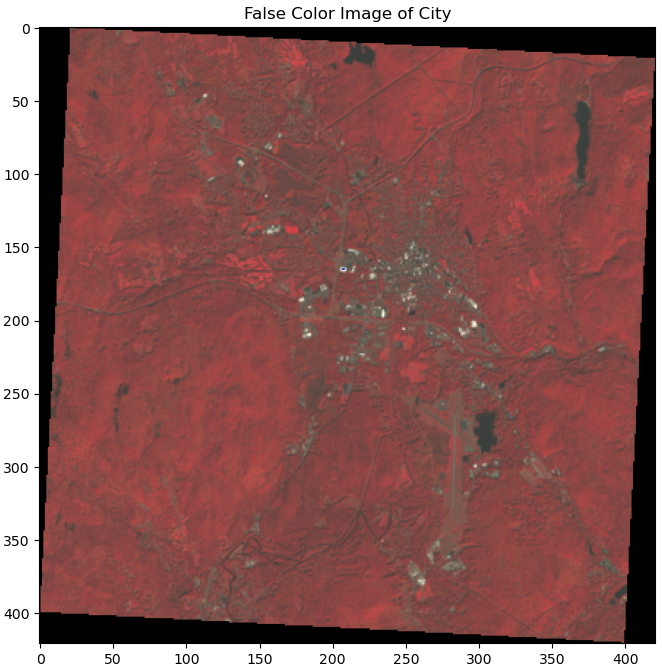